In [102]:
#this project with tie in previous concepts of data management, filtering, visual encoding, color styling, interactivity,
#and dashboarding.

#https://youtu.be/kgdJXN-M3g0 <<<<link to video on this project

#TWEAK the code below to make the following changes:
#1) add a different data source instead of animal and rating, using anything else.  You can either
#     directly type data in or load a dataframe from a csv
#2) add an additional visualisation.  it can be a bar chart, column chart, line chart, anything really.  Do not remove 
#     the existing bar chart.  
#3) conform to a company's marketing / recommended color requirements and share the link to the palette in your code.
#4) submit your homework as a link to your github ipynb page.

In [103]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

In [114]:

# make plots static
%matplotlib inline

# change the dataset to your own data.  it can be ANYTHING, as long as you can make a dashboard from it.
#use different data!
df = pd.read_csv('disney_movies.csv')
df = df.dropna()

In [120]:
# create a class containing an animal selector drop-down, various plots, and a data table output
class GenreRatingDashboard(param.Parameterized):
    
    # drop down selector widget containing the list of animals, with the default being 'Goat'
    Genre = param.ObjectSelector(default='Adventure', objects=list(df.genre.unique()))
    
    
    # create data set containing only the data applicable to the animal in the drop down selector
    def get_data(self):
        class_df = df[(df.genre==self.genre)].copy()
        return class_df

In [122]:

    # seaborn box plot for the chosen animal
    #Add another visualization!
    #change the color! Find a companies branding website and use their approved HEX code, RGB
    #example of color branding here: https://marketing.illinois.edu/visual-identity/color
    
    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot('imdb')
        plt.close()
        return ax.figure
    
        # table of data for the chosen animal
    def table_view(self):
        data = self.get_data()
        return data
    
# create an instance of the class
rd = GenreRatingDashboard(name='')

# create a title for the dashboard
dashboard_title = '# Movie Genre Ratings'

# create some text describing the dashboard
dashboard_desc = 'An example of a simple interactive HoloViz Panel dashboard using a data set of disney movies.'




In [124]:
# create a dashboard, defining the layout as one column containing the
# dashboard title, dashboard description, 'Animal' drop down selector,
# box plot, and data table
dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       # 'Genre' drop down selector
                      #rd.box_view,    # box plot
                      #rd.table_view   # data table
                     )

dashboard.embed(max_opts = 5)

<AxesSubplot:xlabel='genre'>

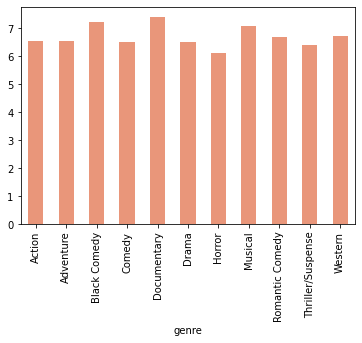

In [125]:
df.groupby('genre')['imdb'].mean().plot(kind='bar', color= 'darksalmon')

#### color pallete site: https://dribbble.com/stories/2019/08/02/amazing-brand-color-palettes-of-the-fortune-500-to-inspire-you

Chemours company

In [118]:
df.groupby('genre')['imdb'].mean()

genre
Action               6.554167
Adventure            6.552308
Black Comedy         7.233333
Comedy               6.520290
Documentary          7.400000
Drama                6.494667
Horror               6.100000
Musical              7.072727
Romantic Comedy      6.686667
Thriller/Suspense    6.383333
Western              6.725000
Name: imdb, dtype: float64